# Cell phenotyping by unsupervised clustering of the single cell data

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.8


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Load the data that we saved in the last tutorial - (Prepare data for SCIMAP)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

`sm.tl.cluster` function can be used for clustering cells within the dataset. It supports three popular clustering algorithms:

- kmeans
- phenograph
- leiden
 
Users are encouraged to select the clustering algorithm that best matches their data's nature and their analytical goals.

In [37]:
adata = sm.tl.cluster(adata, method='leiden', resolution=0.3, use_raw=False, log=False)

Leiden clustering


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.



In [38]:
# view the results
adata.obs['leiden'].value_counts()

leiden
0    3895
1    2661
2    1563
3    1223
4     820
5     496
6     462
7      81
Name: count, dtype: int64

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/heatmap.py:318: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



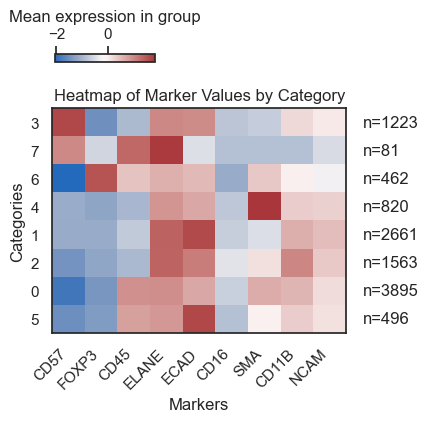

In [39]:
sm.pl.heatmap(adata, groupBy='leiden', standardScale='column', figsize=(5,4), showPrevalence=True)

In [56]:

rename_dict = {'tumor': ['5','1'],
               'myeloid': ['2'],
               'Treg': ['6'],
               'vessels': ['4'],
               'artifacts': ['7'],
                'unknown': ['3','0']}

adata = sm.hl.rename(adata, rename=rename_dict, from_column='leiden', to_column='leiden_phenotype')

Renaming 5 to tumor
Renaming 1 to tumor
Renaming 2 to myeloid
Renaming 6 to Treg
Renaming 4 to vessels
Renaming 7 to artifacts
Renaming 3 to unknown
Renaming 0 to unknown


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/heatmap.py:318: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



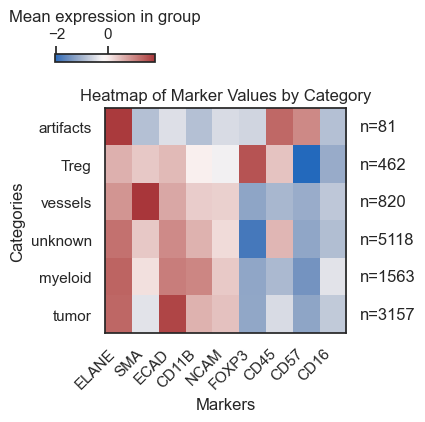

In [57]:
sm.pl.heatmap(adata, groupBy='leiden_phenotype', standardScale='column', figsize=(5,4), showPrevalence=True)

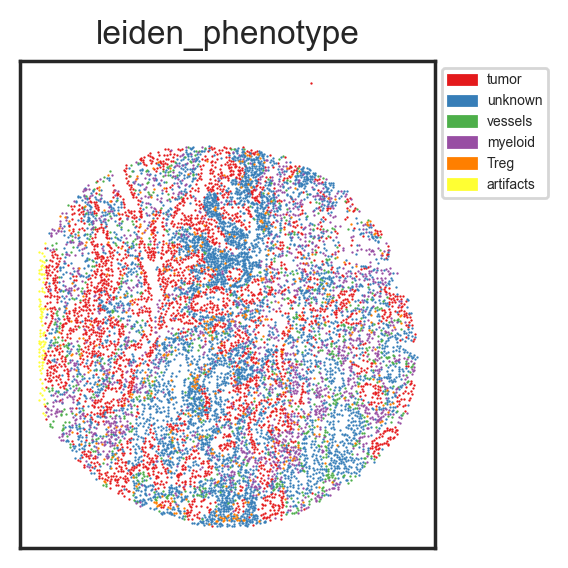

In [58]:
sm.pl.spatial_scatterPlot (adata, colorBy = ['leiden_phenotype'],figsize=(3,3), s=0.7, fontsize=5, catCmap='Set1')